## Time series fundamentals

### We use Pandas to deal with time series

In [2]:
from pandas import read_csv # for files downloaded from ThingSpeak 
from pandas import datetime # for date/time calculations
from pandas import DatetimeIndex # for converting strings into date/time stamps
import matplotlib.pyplot as plt # to plot graphs

### An example file in CSV format (try this with your own data!)

In [3]:
# Get the MM-ENV01 data set, recorded at ICTP during the workshop
total = read_csv('mmenv01.csv') 

In [5]:
# Convert the "created_at" field into data/time stamp
total.index = DatetimeIndex(total['created_at'])

In [12]:
# What methods does this object present to us?
[x for x in dir(total) if not "_" == x[0]]

['T',
 'abs',
 'add',
 'add_prefix',
 'add_suffix',
 'agg',
 'aggregate',
 'align',
 'all',
 'any',
 'append',
 'apply',
 'applymap',
 'as_blocks',
 'as_matrix',
 'asfreq',
 'asof',
 'assign',
 'astype',
 'at',
 'at_time',
 'axes',
 'between_time',
 'bfill',
 'blocks',
 'bool',
 'boxplot',
 'clip',
 'clip_lower',
 'clip_upper',
 'columns',
 'combine',
 'combine_first',
 'compound',
 'consolidate',
 'convert_objects',
 'copy',
 'corr',
 'corrwith',
 'count',
 'cov',
 'created_at',
 'cummax',
 'cummin',
 'cumprod',
 'cumsum',
 'describe',
 'diff',
 'div',
 'divide',
 'dot',
 'drop',
 'drop_duplicates',
 'dropna',
 'dtypes',
 'duplicated',
 'empty',
 'entry_id',
 'eq',
 'equals',
 'eval',
 'ewm',
 'expanding',
 'ffill',
 'field1',
 'field2',
 'field3',
 'field4',
 'field5',
 'fillna',
 'filter',
 'first',
 'first_valid_index',
 'floordiv',
 'from_csv',
 'from_dict',
 'from_items',
 'from_records',
 'ftypes',
 'ge',
 'get',
 'get_dtype_counts',
 'get_ftype_counts',
 'get_value',
 'get_valu

In [13]:
# Try to see a few items at the top
total.iloc[:3]

,created_at,entry_id,field1,field2,field3,field4,field5
created_at,,,,,,,
2017-06-30 09:57:02,2017-06-30 09:57:02 UTC,1,2.9,7.25,325.60,24.5625,1005.823
2017-06-30 09:57:22,2017-06-30 09:57:22 UTC,2,2.9,6.25,324.32,24.6250,1005.865
2017-06-30 09:57:42,2017-06-30 09:57:42 UTC,3,2.9,6.25,328.16,24.6250,1005.883


In [14]:
# and at the bottom
total.iloc[-3:]

,created_at,entry_id,field1,field2,field3,field4,field5
created_at,,,,,,,
2017-06-30 16:13:22,2017-06-30 16:13:22 UTC,1022,2.9,6.25,322.32,25.7500,1004.820
2017-06-30 16:13:42,2017-06-30 16:13:42 UTC,1023,1.9,5.25,315.60,25.6875,1004.803
2017-06-30 16:14:02,2017-06-30 16:14:02 UTC,1024,1.9,4.25,291.84,25.6250,1004.795


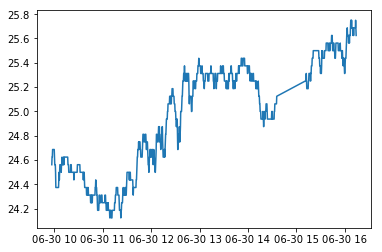

In [15]:
# Let's plot the whole history of the temperature (field4)
plt.plot(total['field4'])
plt.show()

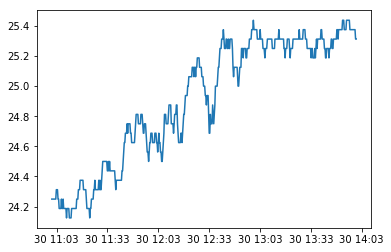

In [16]:
# We can cut a part of the data
part = total[datetime(2017, 6, 30, 11, 0, 0):datetime(2017, 6, 30, 13, 59, 59)]
plt.plot(part['field4'])
plt.show()

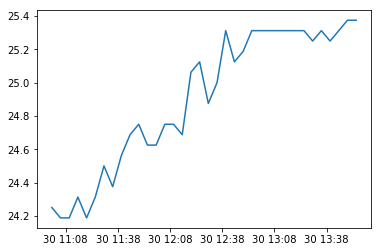

In [18]:
# Let us downsample the data to 5 minutes
data=part.resample('5T').median()
plt.plot(data['field4'])
plt.show()

In [19]:
# Try out other methods and bound variables!
total.first_valid_index()

Timestamp('2017-06-30 09:57:02')

In [20]:
total.last_valid_index()

Timestamp('2017-06-30 16:14:02')

In [22]:
total.size

7168